In [2]:
import numpy as np
import pandas as pd
import cenpy 

In [3]:
pd.options.display.max_columns = 999

In [4]:
acs = cenpy.remote.APIConnection("ACSDT5Y2019")
# Set the map service for pulling geometries
acs.set_mapservice("tigerWMS_ACS2019")

Connection to American Community Survey: 5-Year Estimates: Detailed Tables 5-Year(ID: https://api.census.gov/data/id/ACSDT5Y2019)
With MapServer: Census ACS 2019 WMS

In [5]:
counties = cenpy.explorer.fips_table("COUNTY")
counties.loc[ counties[3].str.contains("Orleans") ]
##071

0   1   2               3   4
1148  LA  22  71  Orleans Parish  H6
1864  NY  36  73  Orleans County  H1
2815  VT  50  19  Orleans County  H1

In [6]:
orleans_code = "071"
la_state_code = "22"

# B25091. Mortgage Status by Selected Monthly Owner Costs as a Percentage of Household Income in the Past 12 Months 

In [27]:
mort = acs.varslike("MORTGAGE STATUS BY SELECTED MONTHLY OWNER COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME IN THE PAST 12 MONTHS", by='concept') # searches along concept column
#race.filter(like="B02001", axis =0)

In [28]:
mort.head()

label  \
GEO_ID                                               Geography   
B25091_002E   Estimate!!Total:!!Housing units with a mortgage:   
B25091_001E                                   Estimate!!Total:   
B25091_019E  Estimate!!Total:!!Housing units without a mort...   
B25091_018E  Estimate!!Total:!!Housing units without a mort...   

                                                       concept predicateType  \
GEO_ID       FAMILY INCOME IN THE PAST 12 MONTHS (IN 2019 I...        string   
B25091_002E  MORTGAGE STATUS BY SELECTED MONTHLY OWNER COST...           int   
B25091_001E  MORTGAGE STATUS BY SELECTED MONTHLY OWNER COST...           int   
B25091_019E  MORTGAGE STATUS BY SELECTED MONTHLY OWNER COST...           int   
B25091_018E  MORTGAGE STATUS BY SELECTED MONTHLY OWNER COST...           int   

                                                         group limit  \
GEO_ID       B17015,B18104,B17016,B18105,B17017,B18106,B170...     0   
B25091_002E                                             B25091     0   
B25091_001E                                             B25091     0   
B25091_019E                                             B25091     0   
B25091_018E                                             B25091     0   

            predicateOnly hasGeoCollectionSupport  \
GEO_ID                NaN                     NaN   
B25091_002E           NaN                     NaN   
B25091_001E           NaN                     NaN   
B25091_019E           NaN                     NaN   
B25091_018E           NaN                     NaN   

                                        attributes required  
GEO_ID                                        NAME      NaN  
B25091_002E  B25091_002EA,B25091_002M,B25091_002MA      NaN  
B25091_001E  B25091_001EA,B25091_001M,B25091_001MA      NaN  
B25091_019E  B25091_019EA,B25091_019M,B25091_019MA      NaN  
B25091_018E  B25091_018EA,B25091_018M,B25091_018MA      NaN

In [29]:
mort["label"].values

array(['Geography', 'Estimate!!Total:!!Housing units with a mortgage:',
       'Estimate!!Total:',
       'Estimate!!Total:!!Housing units without a mortgage:!!30.0 to 34.9 percent',
       'Estimate!!Total:!!Housing units without a mortgage:!!25.0 to 29.9 percent',
       'Estimate!!Total:!!Housing units without a mortgage:!!20.0 to 24.9 percent',
       'Estimate!!Total:!!Housing units without a mortgage:!!15.0 to 19.9 percent',
       'Estimate!!Total:!!Housing units without a mortgage:!!10.0 to 14.9 percent',
       'Estimate!!Total:!!Housing units without a mortgage:!!Not computed',
       'Estimate!!Total:!!Housing units without a mortgage:!!50.0 percent or more',
       'Estimate!!Total:!!Housing units without a mortgage:!!40.0 to 49.9 percent',
       'Estimate!!Total:!!Housing units without a mortgage:!!35.0 to 39.9 percent',
       'Estimate!!Total:!!Housing units with a mortgage:!!35.0 to 39.9 percent',
       'Estimate!!Total:!!Housing units with a mortgage:!!30.0 to 34.9 p

In [30]:
varsmort = mort[1:].index.values
varsmort = np.insert(varsmort,0,'NAME')
varsmort

array(['NAME', 'B25091_002E', 'B25091_001E', 'B25091_019E', 'B25091_018E',
       'B25091_017E', 'B25091_016E', 'B25091_015E', 'B25091_023E',
       'B25091_022E', 'B25091_021E', 'B25091_020E', 'B25091_009E',
       'B25091_008E', 'B25091_007E', 'B25091_006E', 'B25091_005E',
       'B25091_004E', 'B25091_003E', 'B25091_014E', 'B25091_013E',
       'B25091_012E', 'B25091_011E', 'B25091_010E'], dtype=object)

In [31]:
colsmort = ['NAME', 
       'Total_mortgage',
       'Grand_Total',
       'no_mortgage_30.0_34.9_P',
       'no_mortgage_25.0_29.9_P',
       'no_mortgage_20.0_24.9_P',
       'no_mortgage_15.0_19.9_P',
       'no_mortgage_10.0_14.9_P',
       'no_mortgage_not_computed',
       'no_mortgage_50.0_P_more',
       'no_mortgage_40.0_49.9_P',
       'no_mortgage_35.0_39.9_P',
       'mortgage_35.0_39.9_P',
       'mortgage_30.0_34.9_P',
       'mortgage_25.0_29.9_P',
       'mortgage_20.0_24.9_P',
       'mortgage_15.0_19.9_P',
       'mortgage_10.0_14.9_P',
       'mortgage_less_10.0_P',
       'no_mortgage_less_10.0_P',
       'Total_no_mortgage',
       'mortgage_not_computed',
       'mortgage_50.0_P_more',
       'mortgage_40.0_49.9_P']
cols_dictmort = dict(zip(varsmort, colsmort))

In [32]:


mortdata = acs.query(
    cols=varsmort,
    geo_unit="block group:*",
    geo_filter={"state": la_state_code, 
                "county": orleans_code, 
                "tract": "*"},
)

for variable in varsmort:
    
    # Convert all variables EXCEPT for NAME
    if variable != "NAME" :
        mortdata[variable] = mortdata[variable].astype(float)

mortdata = mortdata.rename(columns = cols_dictmort)
mortdata.head()



NAME  Total_mortgage  \
0  Block Group 2, Census Tract 108, Orleans Paris...           148.0   
1  Block Group 2, Census Tract 6.01, Orleans Pari...             6.0   
2  Block Group 1, Census Tract 6.11, Orleans Pari...           142.0   
3  Block Group 2, Census Tract 107, Orleans Paris...           134.0   
4  Block Group 2, Census Tract 132, Orleans Paris...           132.0   

   Grand_Total  no_mortgage_30.0_34.9_P  no_mortgage_25.0_29.9_P  \
0        299.0                      0.0                      0.0   
1          6.0                      0.0                      0.0   
2        373.0                      0.0                     10.0   
3        213.0                      0.0                      0.0   
4        197.0                     14.0                      0.0   

   no_mortgage_20.0_24.9_P  no_mortgage_15.0_19.9_P  no_mortgage_10.0_14.9_P  \
0                      0.0                     18.0                     55.0   
1                      0.0                      0.0                      0.0   
2                      0.0                      0.0                     46.0   
3                      0.0                      6.0                     25.0   
4                      8.0                     10.0                      0.0   

   no_mortgage_not_computed  no_mortgage_50.0_P_more  no_mortgage_40.0_49.9_P  \
0                       0.0                     22.0                     15.0   
1                       0.0                      0.0                      0.0   
2                       0.0                      0.0                     28.0   
3                       0.0                      6.0                      5.0   
4                       0.0                      0.0                      0.0   

   no_mortgage_35.0_39.9_P  mortgage_35.0_39.9_P  mortgage_30.0_34.9_P  \
0                      0.0                   0.0                   9.0   
1                      0.0                   0.0                   0.0   
2                      0.0                  36.0                   0.0   
3                     13.0                  25.0                  10.0   
4                     23.0                   0.0                   9.0   

   mortgage_25.0_29.9_P  mortgage_20.0_24.9_P  mortgage_15.0_19.9_P  \
0                  20.0                  49.0                  17.0   
1                   6.0                   0.0                   0.0   
2                  23.0                  33.0                  20.0   
3                   6.0                  15.0                  30.0   
4                   0.0                  16.0                  58.0   

   mortgage_10.0_14.9_P  mortgage_less_10.0_P  no_mortgage_less_10.0_P  \
0                  21.0                   3.0                     41.0   
1                   0.0                   0.0                      0.0   
2                   0.0                  10.0                    147.0   
3                   6.0                  18.0                     24.0   
4                   7.0                   0.0                     10.0   

   Total_no_mortgage  mortgage_not_computed  mortgage_50.0_P_more  \
0              151.0                    3.0                  17.0   
1                0.0                    0.0                   0.0   
2              231.0                    0.0                  13.0   
3               79.0                    0.0                  24.0   
4               65.0                    0.0                  42.0   

   mortgage_40.0_49.9_P state county   tract block group  
0                   9.0    22    071  010800           2  
1                   0.0    22    071  000601           2  
2                   7.0    22    071  000611           1  
3                   0.0    22    071  010700           2  
4                   0.0    22    071  013200           2

In [44]:
sub = mortdata.iloc[:,21:24]
sub2 = mortdata.iloc[:,12:19]

In [48]:
mortonly = sub.merge(sub2, left_index=True, right_index=True)

In [50]:
mortsub2 = pd.DataFrame(mortonly.idxmax(axis=1)).groupby(by=0, as_index=False).size()
mortsub2["percent"] = (mortsub2["size"]/(mortsub2["size"].sum()))*100

In [51]:
mortsub2

0  size    percent
0   mortgage_10.0_14.9_P    63  12.676056
1   mortgage_15.0_19.9_P    74  14.889336
2   mortgage_20.0_24.9_P    49   9.859155
3   mortgage_25.0_29.9_P    38   7.645875
4   mortgage_30.0_34.9_P    24   4.828974
5   mortgage_35.0_39.9_P    19   3.822938
6   mortgage_40.0_49.9_P    27   5.432596
7   mortgage_50.0_P_more   131  26.358149
8   mortgage_less_10.0_P    28   5.633803
9  mortgage_not_computed    44   8.853119

In [ ]:
<blockquote class='instagram-media' data-instgrm-permalink='https://www.instagram.com/p/CI84oCvFTKL/?utm_source=ig_embed&amp;utm_campaign=loading' data-instgrm-version='14' style=' background:#FFF; border:0; border-radius:3px; box-shadow:0 0 1px 0 rgba(0,0,0,0.5),0 1px 10px 0 rgba(0,0,0,0.15); margin: 1px; max-width:540px; min-width:326px; padding:0; width:99.375%; width:-webkit-calc(100% - 2px); width:calc(100% - 2px);'><div style='padding:16px;'> <a href='https://www.instagram.com/p/CI84oCvFTKL/?utm_source=ig_embed&amp;utm_campaign=loading' style=' background:#FFFFFF; line-height:0; padding:0 0; text-align:center; text-decoration:none; width:100%;' target='_blank'> <div style=' display: flex; flex-direction: row; align-items: center;'> <div style='background-color: #F4F4F4; border-radius: 50%; flex-grow: 0; height: 40px; margin-right: 14px; width: 40px;'></div> <div style='display: flex; flex-direction: column; flex-grow: 1; justify-content: center;'> <div style=' background-color: #F4F4F4; border-radius: 4px; flex-grow: 0; height: 14px; margin-bottom: 6px; width: 100px;'></div> <div style=' background-color: #F4F4F4; border-radius: 4px; flex-grow: 0; height: 14px; width: 60px;'></div></div></div><div style='padding: 19% 0;'></div> <div style='display:block; height:50px; margin:0 auto 12px; width:50px;'><svg width='50px' height='50px' viewBox='0 0 60 60' version='1.1' xmlns='https://www.w3.org/2000/svg' xmlns:xlink='https://www.w3.org/1999/xlink'><g stroke='none' stroke-width='1' fill='none' fill-rule='evenodd'><g transform='translate(-511.000000, -20.000000)' fill='#000000'><g><path d='M556.869,30.41 C554.814,30.41 553.148,32.076 553.148,34.131 C553.148,36.186 554.814,37.852 556.869,37.852 C558.924,37.852 560.59,36.186 560.59,34.131 C560.59,32.076 558.924,30.41 556.869,30.41 M541,60.657 C535.114,60.657 530.342,55.887 530.342,50 C530.342,44.114 535.114,39.342 541,39.342 C546.887,39.342 551.658,44.114 551.658,50 C551.658,55.887 546.887,60.657 541,60.657 M541,33.886 C532.1,33.886 524.886,41.1 524.886,50 C524.886,58.899 532.1,66.113 541,66.113 C549.9,66.113 557.115,58.899 557.115,50 C557.115,41.1 549.9,33.886 541,33.886 M565.378,62.101 C565.244,65.022 564.756,66.606 564.346,67.663 C563.803,69.06 563.154,70.057 562.106,71.106 C561.058,72.155 560.06,72.803 558.662,73.347 C557.607,73.757 556.021,74.244 553.102,74.378 C549.944,74.521 548.997,74.552 541,74.552 C533.003,74.552 532.056,74.521 528.898,74.378 C525.979,74.244 524.393,73.757 523.338,73.347 C521.94,72.803 520.942,72.155 519.894,71.106 C518.846,70.057 518.197,69.06 517.654,67.663 C517.244,66.606 516.755,65.022 516.623,62.101 C516.479,58.943 516.448,57.996 516.448,50 C516.448,42.003 516.479,41.056 516.623,37.899 C516.755,34.978 517.244,33.391 517.654,32.338 C518.197,30.938 518.846,29.942 519.894,28.894 C520.942,27.846 521.94,27.196 523.338,26.654 C524.393,26.244 525.979,25.756 528.898,25.623 C532.057,25.479 533.004,25.448 541,25.448 C548.997,25.448 549.943,25.479 553.102,25.623 C556.021,25.756 557.607,26.244 558.662,26.654 C560.06,27.196 561.058,27.846 562.106,28.894 C563.154,29.942 563.803,30.938 564.346,32.338 C564.756,33.391 565.244,34.978 565.378,37.899 C565.522,41.056 565.552,42.003 565.552,50 C565.552,57.996 565.522,58.943 565.378,62.101 M570.82,37.631 C570.674,34.438 570.167,32.258 569.425,30.349 C568.659,28.377 567.633,26.702 565.965,25.035 C564.297,23.368 562.623,22.342 560.652,21.575 C558.743,20.834 556.562,20.326 553.369,20.18 C550.169,20.033 549.148,20 541,20 C532.853,20 531.831,20.033 528.631,20.18 C525.438,20.326 523.257,20.834 521.349,21.575 C519.376,22.342 517.703,23.368 516.035,25.035 C514.368,26.702 513.342,28.377 512.574,30.349 C511.834,32.258 511.326,34.438 511.181,37.631 C511.035,40.831 511,41.851 511,50 C511,58.147 511.035,59.17 511.181,62.369 C511.326,65.562 511.834,67.743 512.574,69.651 C513.342,71.625 514.368,73.296 516.035,74.965 C517.703,76.634 519.376,77.658 521.349,78.425 C523.257,79.167 525.438,79.673 528.631,79.82 C531.831,79.965 532.853,80.001 541,80.001 C549.148,80.001 550.169,79.965 553.369,79.82 C556.562,79.673 558.743,79.167 560.652,78.425 C562.623,77.658 564.297,76.634 565.965,74.965 C567.633,73.296 568.659,71.625 569.425,69.651 C570.167,67.743 570.674,65.562 570.82,62.369 C570.966,59.17 571,58.147 571,50 C571,41.851 570.966,40.831 570.82,37.631'></path></g></g></g></svg></div><div style='padding-top: 8px;'> <div style=' color:#3897f0; font-family:Arial,sans-serif; font-size:14px; font-style:normal; font-weight:550; line-height:18px;'>View this post on Instagram</div></div><div style='padding: 12.5% 0;'></div> <div style='display: flex; flex-direction: row; margin-bottom: 14px; align-items: center;'><div> <div style='background-color: #F4F4F4; border-radius: 50%; height: 12.5px; width: 12.5px; transform: translateX(0px) translateY(7px);'></div> <div style='background-color: #F4F4F4; height: 12.5px; transform: rotate(-45deg) translateX(3px) translateY(1px); width: 12.5px; flex-grow: 0; margin-right: 14px; margin-left: 2px;'></div> <div style='background-color: #F4F4F4; border-radius: 50%; height: 12.5px; width: 12.5px; transform: translateX(9px) translateY(-18px);'></div></div><div style='margin-left: 8px;'> <div style=' background-color: #F4F4F4; border-radius: 50%; flex-grow: 0; height: 20px; width: 20px;'></div> <div style=' width: 0; height: 0; border-top: 2px solid transparent; border-left: 6px solid #f4f4f4; border-bottom: 2px solid transparent; transform: translateX(16px) translateY(-4px) rotate(30deg)'></div></div><div style='margin-left: auto;'> <div style=' width: 0px; border-top: 8px solid #F4F4F4; border-right: 8px solid transparent; transform: translateY(16px);'></div> <div style=' background-color: #F4F4F4; flex-grow: 0; height: 12px; width: 16px; transform: translateY(-4px);'></div> <div style=' width: 0; height: 0; border-top: 8px solid #F4F4F4; border-left: 8px solid transparent; transform: translateY(-4px) translateX(8px);'></div></div></div> <div style='display: flex; flex-direction: column; flex-grow: 1; justify-content: center; margin-bottom: 24px;'> <div style=' background-color: #F4F4F4; border-radius: 4px; flex-grow: 0; height: 14px; margin-bottom: 6px; width: 224px;'></div> <div style=' background-color: #F4F4F4; border-radius: 4px; flex-grow: 0; height: 14px; width: 144px;'></div></div></a><p style=' color:#c9c8cd; font-family:Arial,sans-serif; font-size:14px; line-height:17px; margin-bottom:0; margin-top:8px; overflow:hidden; padding:8px 0 7px; text-align:center; text-overflow:ellipsis; white-space:nowrap;'><a href='https://www.instagram.com/p/CI84oCvFTKL/?utm_source=ig_embed&amp;utm_campaign=loading' style=' color:#c9c8cd; font-family:Arial,sans-serif; font-size:14px; font-style:normal; font-weight:normal; line-height:17px; text-decoration:none;' target='_blank'>A post shared by Eye on Surveillance (@eos_nola)</a></p></div></blockquote>


In [33]:
halfmort= mortdata[["NAME", 
                    "mortgage_50.0_P_more",
                   "Total_mortgage", 
                   "Total_no_mortgage",
                   "no_mortgage_50.0_P_more",
                   "Grand_Total",
                   "state",
                    "county",
                   "tract",
                   "block group"]]

In [34]:
halfmort = halfmort.fillna(0)
halfmort[halfmort.isna().any(axis=1)]
halfmort.replace(np.inf, 0, inplace=True)


In [35]:
halfmort.iloc[:,1:8]

NAME  mortgage_50.0_P_more  \
0    Block Group 2, Census Tract 108, Orleans Paris...                  17.0   
1    Block Group 2, Census Tract 6.01, Orleans Pari...                   0.0   
2    Block Group 1, Census Tract 6.11, Orleans Pari...                  13.0   
3    Block Group 2, Census Tract 107, Orleans Paris...                  24.0   
4    Block Group 2, Census Tract 132, Orleans Paris...                  42.0   
..                                                 ...                   ...   
492  Block Group 3, Census Tract 14.01, Orleans Par...                   0.0   
493  Block Group 5, Census Tract 14.01, Orleans Par...                   0.0   
494  Block Group 2, Census Tract 17.01, Orleans Par...                   0.0   
495  Block Group 2, Census Tract 31, Orleans Parish...                  11.0   
496  Block Group 2, Census Tract 33.01, Orleans Par...                  10.0   

     Total_mortgage  Total_no_mortgage  no_mortgage_50.0_P_more  Grand_Total  \
0             148.0              151.0                     22.0        299.0   
1               6.0                0.0                      0.0          6.0   
2             142.0              231.0                      0.0        373.0   
3             134.0               79.0                      6.0        213.0   
4             132.0               65.0                      0.0        197.0   
..              ...                ...                      ...          ...   
492             0.0               67.0                     16.0         67.0   
493             0.0               29.0                      0.0         29.0   
494            31.0               40.0                      0.0         71.0   
495            38.0              110.0                      0.0        148.0   
496           173.0               54.0                      0.0        227.0   

    state county   tract block group  
0      22    071  010800           2  
1      22    071  000601           2  
2      22    071  000611           1  
3      22    071  010700           2  
4      22    071  013200           2  
..    ...    ...     ...         ...  
492    22    071  001401           3  
493    22    071  001401           5  
494    22    071  001701           2  
495    22    071  003100           2  
496    22    071  003301           2  

[497 rows x 10 columns]

In [62]:
halfmort.head()
halfmort["P_no_mortgage"] = ( halfmort["Total_no_mortgage"] / halfmort["Grand_Total"] ) * 100
halfmort["P_mortgage"] = ( halfmort["Total_mortgage"] / halfmort["Grand_Total"] ) * 100
halfmort["P_mort_50_P"] =  ( halfmort["mortgage_50.0_P_more"] / halfmort["Total_mortgage"] ) * 100
halfmort["P_no_mort_50_P"] = ( halfmort["no_mortgage_50.0_P_more"] / halfmort["Total_mortgage"] ) * 100

C:\Users\brine\AppData\Local\Temp/ipykernel_28800/3942380216.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  halfmort["P_no_mortgage"] = ( halfmort["Total_no_mortgage"] / halfmort["Grand_Total"] ) * 100
C:\Users\brine\AppData\Local\Temp/ipykernel_28800/3942380216.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  halfmort["P_mortgage"] = ( halfmort["Total_mortgage"] / halfmort["Grand_Total"] ) * 100
C:\Users\brine\AppData\Local\Temp/ipykernel_28800/3942380216.py:4: SettingWithCopyWarning: 
A value is t

# Gross Rent as a Percentage of HHI

In [7]:
rent = acs.varslike("GROSS RENT AS", by='concept').sort_index() # searches along concept column
#race.filter(like="B02001", axis =0)

In [8]:
rent.head(n=40)

label  \
B25070_001E                                   Estimate!!Total:   
B25070_002E           Estimate!!Total:!!Less than 10.0 percent   
B25070_003E             Estimate!!Total:!!10.0 to 14.9 percent   
B25070_004E             Estimate!!Total:!!15.0 to 19.9 percent   
B25070_005E             Estimate!!Total:!!20.0 to 24.9 percent   
B25070_006E             Estimate!!Total:!!25.0 to 29.9 percent   
B25070_007E             Estimate!!Total:!!30.0 to 34.9 percent   
B25070_008E             Estimate!!Total:!!35.0 to 39.9 percent   
B25070_009E             Estimate!!Total:!!40.0 to 49.9 percent   
B25070_010E             Estimate!!Total:!!50.0 percent or more   
B25070_011E                     Estimate!!Total:!!Not computed   
B25071_001E  Estimate!!Median gross rent as a percentage of...   
B25072_001E                                   Estimate!!Total:   
B25072_002E      Estimate!!Total:!!Householder 15 to 24 years:   
B25072_003E  Estimate!!Total:!!Householder 15 to 24 years:!...   
B25072_004E  Estimate!!Total:!!Householder 15 to 24 years:!...   
B25072_005E  Estimate!!Total:!!Householder 15 to 24 years:!...   
B25072_006E  Estimate!!Total:!!Householder 15 to 24 years:!...   
B25072_007E  Estimate!!Total:!!Householder 15 to 24 years:!...   
B25072_008E  Estimate!!Total:!!Householder 15 to 24 years:!...   
B25072_009E      Estimate!!Total:!!Householder 25 to 34 years:   
B25072_010E  Estimate!!Total:!!Householder 25 to 34 years:!...   
B25072_011E  Estimate!!Total:!!Householder 25 to 34 years:!...   
B25072_012E  Estimate!!Total:!!Householder 25 to 34 years:!...   
B25072_013E  Estimate!!Total:!!Householder 25 to 34 years:!...   
B25072_014E  Estimate!!Total:!!Householder 25 to 34 years:!...   
B25072_015E  Estimate!!Total:!!Householder 25 to 34 years:!...   
B25072_016E      Estimate!!Total:!!Householder 35 to 64 years:   
B25072_017E  Estimate!!Total:!!Householder 35 to 64 years:!...   
B25072_018E  Estimate!!Total:!!Householder 35 to 64 years:!...   
B25072_019E  Estimate!!Total:!!Householder 35 to 64 years:!...   
B25072_020E  Estimate!!Total:!!Householder 35 to 64 years:!...   
B25072_021E  Estimate!!Total:!!Householder 35 to 64 years:!...   
B25072_022E  Estimate!!Total:!!Householder 35 to 64 years:!...   
B25072_023E   Estimate!!Total:!!Householder 65 years and over:   
B25072_024E  Estimate!!Total:!!Householder 65 years and ove...   
B25072_025E  Estimate!!Total:!!Householder 65 years and ove...   
B25072_026E  Estimate!!Total:!!Householder 65 years and ove...   
B25072_027E  Estimate!!Total:!!Householder 65 years and ove...   
B25072_028E  Estimate!!Total:!!Householder 65 years and ove...   

                                                       concept predicateType  \
B25070_001E  GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME...           int   
B25070_002E  GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME...           int   
B25070_003E  GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME...           int   
B25070_004E  GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME...           int   
B25070_005E  GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME...           int   
B25070_006E  GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME...           int   
B25070_007E  GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME...           int   
B25070_008E  GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME...           int   
B25070_009E  GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME...           int   
B25070_010E  GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME...           int   
B25070_011E  GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME...           int   
B25071_001E  MEDIAN GROSS RENT AS A PERCENTAGE OF HOUSEHOLD...         float   
B25072_001E  AGE OF HOUSEHOLDER BY GROSS RENT AS A PERCENTA...           int   
B25072_002E  AGE OF HOUSEHOLDER BY GROSS RENT AS A PERCENTA...           int   
B25072_003E  AGE OF HOUSEHOLDER BY GROSS RENT AS A PERCENTA...           int   
B25072_004E  AGE OF HOUSEHOLDER BY GROSS RENT AS A PERCENTA...        

In [9]:
rent=["NAME", "B25070_001E", 
      "B25070_005E", 
      "B25070_006E", 
      "B25070_007E", 
      "B25070_008E",
      "B25070_009E",
      "B25070_010E",
      "B25070_011E"]
colsRent = ['NAME','Totals', 
        '20_25P',
       '25_30P',
       '30_35P',
       '35_40P',
       '40_50P',
       '50_moreP',
       'NotComp']
cols_dictRent = dict(zip(rent, colsRent))

In [10]:

rentdata = acs.query(
    cols=rent,
    geo_unit="block group:*",
    geo_filter={"state": la_state_code, 
                "county": orleans_code, 
                "tract": "*"},
)

for variable in rent:
    
    # Convert all variables EXCEPT for NAME
    if variable != "NAME":
        rentdata[variable] = rentdata[variable].astype(float)

rentdata = rentdata.rename(columns = cols_dictRent)
rentdata.head()

NAME  Totals  20_25P  25_30P  \
0  Block Group 2, Census Tract 108, Orleans Paris...   165.0    14.0    51.0   
1  Block Group 2, Census Tract 6.01, Orleans Pari...   154.0    53.0    10.0   
2  Block Group 1, Census Tract 6.11, Orleans Pari...   226.0    29.0    38.0   
3  Block Group 2, Census Tract 107, Orleans Paris...   257.0    25.0     0.0   
4  Block Group 2, Census Tract 132, Orleans Paris...   150.0     0.0    29.0   

   30_35P  35_40P  40_50P  50_moreP  NotComp state county   tract block group  
0     7.0     6.0    10.0      25.0      2.0    22    071  010800           2  
1     9.0     0.0    16.0      38.0      5.0    22    071  000601           2  
2     0.0     6.0     0.0      83.0     50.0    22    071  000611           1  
3    58.0    20.0    15.0      41.0     10.0    22    071  010700           2  
4     6.0     0.0     0.0      65.0      6.0    22    071  013200           2

In [21]:
rentsub=rentdata.iloc[:,2:9]
rentsub2=pd.DataFrame(rentsub.idxmax(axis=1)).groupby(by=0, as_index=False).size()

In [23]:
rentsub2["size"].sum()

497

In [24]:
rentsub2["percent"] = (rentsub2["size"]/(rentsub2["size"].sum()))*100

In [25]:
rentsub2

0  size    percent
0    20_25P    47   9.456740
1    25_30P    32   6.438632
2    30_35P    25   5.030181
3    35_40P    23   4.627767
4    40_50P    16   3.219316
5  50_moreP   307  61.770624
6   NotComp    47   9.456740

In [36]:
rentdata["adj_total"] = (rentdata["Totals"] - rentdata["NotComp"])
rentdata["P50_moreP"] = (rentdata["50_moreP"]/rentdata["adj_total"])*100
rentdata["P40P"] = (rentdata["40_50P"]/rentdata["adj_total"])*100
rentdata["P30P"] = ((rentdata["30_35P"] + rentdata["35_40P"])/rentdata["adj_total"])*100

In [54]:
rentdata.head()

NAME  Totals  20_25P  25_30P  \
0  Block Group 2, Census Tract 108, Orleans Paris...   165.0    14.0    51.0   
1  Block Group 2, Census Tract 6.01, Orleans Pari...   154.0    53.0    10.0   
2  Block Group 1, Census Tract 6.11, Orleans Pari...   226.0    29.0    38.0   
3  Block Group 2, Census Tract 107, Orleans Paris...   257.0    25.0     0.0   
4  Block Group 2, Census Tract 132, Orleans Paris...   150.0     0.0    29.0   

   30_35P  35_40P  40_50P  50_moreP  NotComp state county   tract block group  \
0     7.0     6.0    10.0      25.0      2.0    22    071  010800           2   
1     9.0     0.0    16.0      38.0      5.0    22    071  000601           2   
2     0.0     6.0     0.0      83.0     50.0    22    071  000611           1   
3    58.0    20.0    15.0      41.0     10.0    22    071  010700           2   
4     6.0     0.0     0.0      65.0      6.0    22    071  013200           2   

   adj_total  P50_moreP       P40P       P30P  
0      163.0  15.337423   6.134969   7.975460  
1      149.0  25.503356  10.738255   6.040268  
2      176.0  47.159091   0.000000   3.409091  
3      247.0  16.599190   6.072874  31.578947  
4      144.0  45.138889   0.000000   4.166667

In [39]:
rentdata[rentdata["P50_moreP"].isna()][["50_moreP","P50_moreP"]]

50_moreP  P50_moreP
34        0.0        NaN
50        0.0        NaN
58        0.0        NaN
74        0.0        NaN
120       0.0        NaN
122       0.0        NaN
126       0.0        NaN
141       0.0        NaN
150       0.0        NaN
168       0.0        NaN
261       0.0        NaN
285       0.0        NaN
299       0.0        NaN
304       0.0        NaN
305       0.0        NaN
347       0.0        NaN
351       0.0        NaN
355       0.0        NaN
470       0.0        NaN

In [58]:
rentdata_sub = rentdata[["NAME", "Totals", "adj_total", "P50_moreP", "P40P", "P30P", "state", "county", "tract", "block group"]]

In [59]:
rentdata_geo = block_groups.merge(
    rentdata_sub,
    left_on=["STATE", "COUNTY", "TRACT", "BLKGRP"],
    right_on=["state", "county", "tract", "block group"],
)

In [19]:
ASdata_geo = block_groups.merge(
    ASdata,
    left_on=["STATE", "COUNTY", "TRACT", "BLKGRP"],
    right_on=["state", "county", "tract", "block group"],
)

rdata_geo = block_groups.merge(
    rdata,
    left_on=["STATE", "COUNTY", "TRACT", "BLKGRP"],
    right_on=["state", "county", "tract", "block group"],
)

rentdata_geo = block_groups.merge(
    rentdata_sub,
    left_on=["STATE", "COUNTY", "TRACT", "BLKGRP"],
    right_on=["state", "county", "tract", "block group"],
)

In [61]:
rdata_geo2 = rdata_geo.to_crs(4326)
ASdata_geo2 = ASdata_geo.to_crs(4326)
rentdata_geo2 =rentdata_geo.to_crs(4326)

# Median House Price

In [72]:
mhh = acs.varslike("HOUSE", by='concept').sort_index() # searches along concept column
#race.filter(like="B02001", axis =0)

In [79]:
mhh.head()

label  \
B08201_001E                        Estimate!!Total:   
B08201_002E  Estimate!!Total:!!No vehicle available   
B08201_003E   Estimate!!Total:!!1 vehicle available   
B08201_004E  Estimate!!Total:!!2 vehicles available   
B08201_005E  Estimate!!Total:!!3 vehicles available   

                                          concept predicateType   group limit  \
B08201_001E  HOUSEHOLD SIZE BY VEHICLES AVAILABLE           int  B08201     0   
B08201_002E  HOUSEHOLD SIZE BY VEHICLES AVAILABLE           int  B08201     0   
B08201_003E  HOUSEHOLD SIZE BY VEHICLES AVAILABLE           int  B08201     0   
B08201_004E  HOUSEHOLD SIZE BY VEHICLES AVAILABLE           int  B08201     0   
B08201_005E  HOUSEHOLD SIZE BY VEHICLES AVAILABLE           int  B08201     0   

            predicateOnly                             attributes required  
B08201_001E           NaN  B08201_001EA,B08201_001M,B08201_001MA      NaN  
B08201_002E           NaN  B08201_002EA,B08201_002M,B08201_002MA      NaN  
B08201_003E           NaN  B08201_003EA,B08201_003M,B08201_003MA      NaN  
B08201_004E           NaN  B08201_004EA,B08201_004M,B08201_004MA      NaN  
B08201_005E           NaN  B08201_005EA,B08201_005M,B08201_005MA      NaN

# Race

In [6]:
hisp = acs.varslike("MEDIAN AGE BY SEX", by='concept').sort_index()

In [113]:
hisp.shape

(34, 8)

In [114]:
hisp.head(n=60)

label  \
B01002A_001E         Estimate!!Median age --!!Total:   
B01002A_002E           Estimate!!Median age --!!Male   
B01002A_003E         Estimate!!Median age --!!Female   
B01002B_001E         Estimate!!Median age --!!Total:   
B01002B_002E           Estimate!!Median age --!!Male   
B01002B_003E         Estimate!!Median age --!!Female   
B01002C_001E         Estimate!!Median age --!!Total:   
B01002C_002E           Estimate!!Median age --!!Male   
B01002C_003E         Estimate!!Median age --!!Female   
B01002D_001E         Estimate!!Median age --!!Total:   
B01002D_002E           Estimate!!Median age --!!Male   
B01002D_003E         Estimate!!Median age --!!Female   
B01002E_001E         Estimate!!Median age --!!Total:   
B01002E_002E           Estimate!!Median age --!!Male   
B01002E_003E         Estimate!!Median age --!!Female   
B01002F_001E         Estimate!!Median age --!!Total:   
B01002F_002E           Estimate!!Median age --!!Male   
B01002F_003E         Estimate!!Median age --!!Female   
B01002G_001E         Estimate!!Median age --!!Total:   
B01002G_002E           Estimate!!Median age --!!Male   
B01002G_003E         Estimate!!Median age --!!Female   
B01002H_001E         Estimate!!Median age --!!Total:   
B01002H_002E           Estimate!!Median age --!!Male   
B01002H_003E         Estimate!!Median age --!!Female   
B01002I_001E         Estimate!!Median age --!!Total:   
B01002I_002E           Estimate!!Median age --!!Male   
B01002I_003E         Estimate!!Median age --!!Female   
B01002_001E          Estimate!!Median age --!!Total:   
B01002_002E            Estimate!!Median age --!!Male   
B01002_003E          Estimate!!Median age --!!Female   
B23013_001E           Estimate!!Median age--!!Total:   
B23013_002E     Estimate!!Median age--!!Total:!!Male   
B23013_003E   Estimate!!Median age--!!Total:!!Female   
GEO_ID                                     Geography   

                                                        concept predicateType  \
B01002A_001E                    MEDIAN AGE BY SEX (WHITE ALONE)         float   
B01002A_002E                    MEDIAN AGE BY SEX (WHITE ALONE)         float   
B01002A_003E                    MEDIAN AGE BY SEX (WHITE ALONE)         float   
B01002B_001E  MEDIAN AGE BY SEX (BLACK OR AFRICAN AMERICAN A...         float   
B01002B_002E  MEDIAN AGE BY SEX (BLACK OR AFRICAN AMERICAN A...         float   
B01002B_003E  MEDIAN AGE BY SEX (BLACK OR AFRICAN AMERICAN A...         float   
B01002C_001E  MEDIAN AGE BY SEX (AMERICAN INDIAN AND ALASKA ...         float   
B01002C_002E  MEDIAN AGE BY SEX (AMERICAN INDIAN AND ALASKA ...         float   
B01002C_003E  MEDIAN AGE BY SEX (AMERICAN INDIAN AND ALASKA ...         float   
B01002D_001E                    MEDIAN AGE BY SEX (ASIAN ALONE)         float   
B01002D_002E                    MEDIAN AGE BY SEX (ASIAN ALONE)         float   
B01002D_003E                    MEDIAN AGE BY SEX (ASIAN ALONE)         float   
B01002E_001E  MEDIAN AGE BY SEX (NATIVE HAWAIIAN AND OTHER P...         float   
B01002E_002E  MEDIAN AGE BY SEX (NATIVE HAWAIIAN AND OTHER P...         float   
B01002E_003E  MEDIAN AGE BY SEX (NATIVE HAWAIIAN AND OTHER P...         float   
B01002F_001E          MEDIAN AGE BY SEX (SOME OTHER RACE ALONE)         float   
B01002F_002E          MEDIAN AGE BY SEX (SOME OTHER RACE ALONE)         float   
B01002F_003E          MEDIAN AGE BY SEX (SOME OTHER RACE ALONE)         float   
B01002G_001E              MEDIAN AGE BY SEX (TWO OR MORE RACES)         float   
B01002G_002E              MEDIAN AGE BY SEX (TWO OR MORE RACES)         float   
B01002G_003E              MEDIAN AGE BY SEX (TWO OR MORE RACES)         float   
B01002H_001E  MEDIAN AGE BY SEX (WHITE ALONE, NOT HISPANIC O...         float   
B01002H_002E  MEDIAN AGE BY SEX (WHITE ALONE, NOT HISPANIC O...         float   
B01002H_003E  MEDIAN AGE BY SEX (WHITE ALONE, NOT HISPANIC O...         float   
B01002I_001E             MEDIAN AGE BY SEX (HISPANIC OR LATIN

In [106]:
hisp = ["NAME","B01002I_001E"]
colsH = ['NAME','Total_Hispanic']
cols_dictH = dict(zip(hisp, colsH))
hispdata = acs.query(
    cols=hisp,
    geo_unit="block group:*",
    geo_filter={"state": la_state_code, 
                "county": orleans_code, 
                "tract": "*"},
)

for variable in hisp:
    
    # Convert all variables EXCEPT for NAME
    if variable != "NAME":
        hispdata[variable] = hispdata[variable].astype(float)

hispdata = hispdata.rename(columns = cols_dictH)
hispdata.head()

NAME  Total_Hispanic state  \
0  Block Group 2, Census Tract 108, Orleans Paris...            26.5    22   
1  Block Group 2, Census Tract 6.01, Orleans Pari...    -666666666.0    22   
2  Block Group 1, Census Tract 6.11, Orleans Pari...    -666666666.0    22   
3  Block Group 2, Census Tract 107, Orleans Paris...    -666666666.0    22   
4  Block Group 2, Census Tract 132, Orleans Paris...    -666666666.0    22   

  county   tract block group  
0    071  010800           2  
1    071  000601           2  
2    071  000611           1  
3    071  010700           2  
4    071  013200           2

In [107]:
hispdata.loc[hispdata["Total_Hispanic"] < 0, "Total_Hispanic"] = 0

In [110]:
hispdata

NAME  Total_Hispanic state  \
0    Block Group 2, Census Tract 108, Orleans Paris...            26.5    22   
6    Block Group 2, Census Tract 33.02, Orleans Par...            60.9    22   
8    Block Group 2, Census Tract 96, Orleans Parish...            11.9    22   
9    Block Group 2, Census Tract 106, Orleans Paris...            28.5    22   
11   Block Group 3, Census Tract 27, Orleans Parish...            52.4    22   
..                                                 ...             ...   ...   
484  Block Group 2, Census Tract 130, Orleans Paris...             4.2    22   
485  Block Group 3, Census Tract 25.03, Orleans Par...            42.3    22   
490  Block Group 3, Census Tract 1, Orleans Parish,...            41.5    22   
495  Block Group 2, Census Tract 31, Orleans Parish...            37.9    22   
496  Block Group 2, Census Tract 33.01, Orleans Par...            40.5    22   

    county   tract block group  
0      071  010800           2  
6      071  003302           2  
8      071  009600           2  
9      071  010600           2  
11     071  002700           3  
..     ...     ...         ...  
484    071  013000           2  
485    071  002503           3  
490    071  000100           3  
495    071  003100           2  
496    071  003301           2  

[247 rows x 6 columns]

In [7]:
race = acs.varslike("RACE", by='concept').sort_index() # searches along concept column
race.filter(like="B02001", axis =0)

label concept  \
B02001_001E                                   Estimate!!Total:    RACE   
B02001_002E                      Estimate!!Total:!!White alone    RACE   
B02001_003E  Estimate!!Total:!!Black or African American alone    RACE   
B02001_004E  Estimate!!Total:!!American Indian and Alaska N...    RACE   
B02001_005E                      Estimate!!Total:!!Asian alone    RACE   
B02001_006E  Estimate!!Total:!!Native Hawaiian and Other Pa...    RACE   
B02001_007E            Estimate!!Total:!!Some other race alone    RACE   
B02001_008E               Estimate!!Total:!!Two or more races:    RACE   
B02001_009E  Estimate!!Total:!!Two or more races:!!Two race...    RACE   
B02001_010E  Estimate!!Total:!!Two or more races:!!Two race...    RACE   

            predicateType   group limit predicateOnly  \
B02001_001E           int  B02001     0           NaN   
B02001_002E           int  B02001     0           NaN   
B02001_003E           int  B02001     0           NaN   
B02001_004E           int  B02001     0           NaN   
B02001_005E           int  B02001     0           NaN   
B02001_006E           int  B02001     0           NaN   
B02001_007E           int  B02001     0           NaN   
B02001_008E           int  B02001     0           NaN   
B02001_009E           int  B02001     0           NaN   
B02001_010E           int  B02001     0           NaN   

                                        attributes required  
B02001_001E  B02001_001EA,B02001_001M,B02001_001MA      NaN  
B02001_002E  B02001_002EA,B02001_002M,B02001_002MA      NaN  
B02001_003E  B02001_003EA,B02001_003M,B02001_003MA      NaN  
B02001_004E  B02001_004EA,B02001_004M,B02001_004MA      NaN  
B02001_005E  B02001_005EA,B02001_005M,B02001_005MA      NaN  
B02001_006E  B02001_006EA,B02001_006M,B02001_006MA      NaN  
B02001_007E  B02001_007EA,B02001_007M,B02001_007MA      NaN  
B02001_008E  B02001_008EA,B02001_008M,B02001_008MA      NaN  
B02001_009E  B02001_009EA,B02001_009M,B02001_009MA      NaN  
B02001_010E  B02001_010EA,B02001_010M,B02001_010MA      NaN

In [8]:
h = race.filter(like="B02001", axis=0)
h.index.values

array(['B02001_001E', 'B02001_002E', 'B02001_003E', 'B02001_004E',
       'B02001_005E', 'B02001_006E', 'B02001_007E', 'B02001_008E',
       'B02001_009E', 'B02001_010E'], dtype=object)

In [9]:
varsR = h.index.values
varsR = np.insert(varsR,0,'NAME')


In [10]:
cols = ['NAME','Totals', 'W',
       'BAA',
       'AI_AN',
       'Asian',
       'NH_PI',
       'Some_other_race',
       'Two_or_more_races',
       'Two_or_more_races_S',
       'Two_or_more_races_ES']
cols_dict = dict(zip(varsR, cols))

In [11]:


rdata = acs.query(
    cols=varsR,
    geo_unit="block group:*",
    geo_filter={"state": la_state_code, 
                "county": orleans_code, 
                "tract": "*"},
)

for variable in varsR:
    
    # Convert all variables EXCEPT for NAME
    if variable != "NAME":
        rdata[variable] = rdata[variable].astype(float)

rdata = rdata.rename(columns = cols_dict)
rdata.head()



NAME  Totals      W     BAA  \
0  Block Group 2, Census Tract 108, Orleans Paris...   970.0  892.0    32.0   
1  Block Group 2, Census Tract 6.01, Orleans Pari...   618.0   17.0   601.0   
2  Block Group 1, Census Tract 6.11, Orleans Pari...  1971.0    9.0  1962.0   
3  Block Group 2, Census Tract 107, Orleans Paris...  1081.0  902.0   108.0   
4  Block Group 2, Census Tract 132, Orleans Paris...   801.0  219.0   547.0   

   AI_AN  Asian  NH_PI  Some_other_race  Two_or_more_races  \
0    0.0    5.0    0.0              7.0               34.0   
1    0.0    0.0    0.0              0.0                0.0   
2    0.0    0.0    0.0              0.0                0.0   
3    0.0   15.0    0.0             16.0               40.0   
4   14.0    0.0    0.0              0.0               21.0   

   Two_or_more_races_S  Two_or_more_races_ES state county   tract block group  
0                  0.0                  34.0    22    071  010800           2  
1                  0.0                   0.0    22    071  000601           2  
2                  0.0                   0.0    22    071  000611           1  
3                  0.0                  40.0    22    071  010700           2  
4                  0.0                  21.0    22    071  013200           2

In [13]:
justtotals = rdata[["state", "county", "tract", "block group", "Totals"]]

In [ ]:
justtotals

In [14]:
justtotals.to_csv("justtotals.csv", index=False)

In [27]:
rdata["BAA_P"] = (rdata["BAA"]/rdata["Totals"])*100
rdata["W_P"] = (rdata["W"]/rdata["Totals"])*100
rdata["AI_AN_P"] = (rdata["AI_AN"]/rdata["Totals"])*100
rdata["Asian_P"] = (rdata["Asian"]/rdata["Totals"])*100
rdata["NH_PI_P"] = (rdata["NH_PI"]/rdata["Totals"])*100

In [32]:
rdata[rdata["NH_PI_P"].isna()][["NH_PI","NH_PI_P"]]

NH_PI  NH_PI_P
150    0.0      NaN
261    0.0      NaN
304    0.0      NaN
305    0.0      NaN
347    0.0      NaN
351    0.0      NaN

In [127]:
rdata_sub = rdata[["NAME", "BAA_P", "W_P", "AI_AN_P", "Asian_P", "NH_PI_P", "state", "county", "tract", "block group"]]

In [151]:
rdata_sub

NAME       BAA_P        W_P  \
0    Block Group 2, Census Tract 108, Orleans Paris...    3.298969  91.958763   
1    Block Group 2, Census Tract 6.01, Orleans Pari...   97.249191   2.750809   
2    Block Group 1, Census Tract 6.11, Orleans Pari...   99.543379   0.456621   
3    Block Group 2, Census Tract 107, Orleans Paris...    9.990749  83.441258   
4    Block Group 2, Census Tract 132, Orleans Paris...   68.289638  27.340824   
..                                                 ...         ...        ...   
492  Block Group 3, Census Tract 14.01, Orleans Par...  100.000000   0.000000   
493  Block Group 5, Census Tract 14.01, Orleans Par...   83.571429  16.428571   
494  Block Group 2, Census Tract 17.01, Orleans Par...   96.289062   0.000000   
495  Block Group 2, Census Tract 31, Orleans Parish...   95.379147   3.317536   
496  Block Group 2, Census Tract 33.01, Orleans Par...   44.425676  53.378378   

      AI_AN_P   Asian_P  NH_PI_P state county   tract block group  
0    0.000000  0.515464      0.0    22    071  010800           2  
1    0.000000  0.000000      0.0    22    071  000601           2  
2    0.000000  0.000000      0.0    22    071  000611           1  
3    0.000000  1.387604      0.0    22    071  010700           2  
4    1.747815  0.000000      0.0    22    071  013200           2  
..        ...       ...      ...   ...    ...     ...         ...  
492  0.000000  0.000000      0.0    22    071  001401           3  
493  0.000000  0.000000      0.0    22    071  001401           5  
494  0.000000  0.000000      0.0    22    071  001701           2  
495  0.000000  0.000000      0.0    22    071  003100           2  
496  0.000000  2.195946      0.0    22    071  003301           2  

[497 rows x 10 columns]

# Age By Sex

In [134]:
agesex = acs.varslike("SEX BY AGE", by='concept').sort_index() # searches along concept column
agesex.filter(like="B01001", axis =0).tail(n=49)

label     concept  \
B01001_001E                              Estimate!!Total:  SEX BY AGE   
B01001_002E                       Estimate!!Total:!!Male:  SEX BY AGE   
B01001_003E        Estimate!!Total:!!Male:!!Under 5 years  SEX BY AGE   
B01001_004E         Estimate!!Total:!!Male:!!5 to 9 years  SEX BY AGE   
B01001_005E       Estimate!!Total:!!Male:!!10 to 14 years  SEX BY AGE   
B01001_006E       Estimate!!Total:!!Male:!!15 to 17 years  SEX BY AGE   
B01001_007E      Estimate!!Total:!!Male:!!18 and 19 years  SEX BY AGE   
B01001_008E             Estimate!!Total:!!Male:!!20 years  SEX BY AGE   
B01001_009E             Estimate!!Total:!!Male:!!21 years  SEX BY AGE   
B01001_010E       Estimate!!Total:!!Male:!!22 to 24 years  SEX BY AGE   
B01001_011E       Estimate!!Total:!!Male:!!25 to 29 years  SEX BY AGE   
B01001_012E       Estimate!!Total:!!Male:!!30 to 34 years  SEX BY AGE   
B01001_013E       Estimate!!Total:!!Male:!!35 to 39 years  SEX BY AGE   
B01001_014E       Estimate!!Total:!!Male:!!40 to 44 years  SEX BY AGE   
B01001_015E       Estimate!!Total:!!Male:!!45 to 49 years  SEX BY AGE   
B01001_016E       Estimate!!Total:!!Male:!!50 to 54 years  SEX BY AGE   
B01001_017E       Estimate!!Total:!!Male:!!55 to 59 years  SEX BY AGE   
B01001_018E      Estimate!!Total:!!Male:!!60 and 61 years  SEX BY AGE   
B01001_019E       Estimate!!Total:!!Male:!!62 to 64 years  SEX BY AGE   
B01001_020E      Estimate!!Total:!!Male:!!65 and 66 years  SEX BY AGE   
B01001_021E       Estimate!!Total:!!Male:!!67 to 69 years  SEX BY AGE   
B01001_022E       Estimate!!Total:!!Male:!!70 to 74 years  SEX BY AGE   
B01001_023E       Estimate!!Total:!!Male:!!75 to 79 years  SEX BY AGE   
B01001_024E       Estimate!!Total:!!Male:!!80 to 84 years  SEX BY AGE   
B01001_025E    Estimate!!Total:!!Male:!!85 years and over  SEX BY AGE   
B01001_026E                     Estimate!!Total:!!Female:  SEX BY AGE   
B01001_027E      Estimate!!Total:!!Female:!!Under 5 years  SEX BY AGE   
B01001_028E       Estimate!!Total:!!Female:!!5 to 9 years  SEX BY AGE   
B01001_029E     Estimate!!Total:!!Female:!!10 to 14 years  SEX BY AGE   
B01001_030E     Estimate!!Total:!!Female:!!15 to 17 years  SEX BY AGE   
B01001_031E    Estimate!!Total:!!Female:!!18 and 19 years  SEX BY AGE   
B01001_032E           Estimate!!Total:!!Female:!!20 years  SEX BY AGE   
B01001_033E           Estimate!!Total:!!Female:!!21 years  SEX BY AGE   
B01001_034E     Estimate!!Total:!!Female:!!22 to 24 years  SEX BY AGE   
B01001_035E     Estimate!!Total:!!Female:!!25 to 29 years  SEX BY AGE   
B01001_036E     Estimate!!Total:!!Female:!!30 to 34 years  SEX BY AGE   
B01001_037E     Estimate!!Total:!!Female:!!35 to 39 years  SEX BY AGE   
B01001_038E     Estimate!!Total:!!Female:!!40 to 44 years  SEX BY AGE   
B01001_039E     Estimate!!Total:!!Female:!!45 to 49 years  SEX BY AGE   
B01001_040E     Estimate!!Total:!!Female:!!50 to 54 years  SEX BY AGE   
B01001_041E     Estimate!!Total:!!Female:!!55 to 59 years  SEX BY AGE   
B01001_042E    Estimate!!Total:!!Female:!!60 and 61 years  SEX BY AGE   
B01001_043E     Estimate!!Total:!!Female:!!62 to 64 years  SEX BY AGE   
B01001_044E    Estimate!!Total:!!Female:!!65 and 66 years  SEX BY AGE   
B01001_045E     Estimate!!Total:!!Female:!!67 to 69 years  SEX BY AGE   
B01001_046E     Estimate!!Total:!!Female:!!70 to 74 years  SEX BY AGE   
B01001_047E     Estimate!!Total:!!Female:!!75 to 79 years  SEX BY AGE   
B01001_048E     Estimate!!Total:!!Female:!!80 to 84 years  SEX BY AGE   
B01001_049E  Estimate!!Total:!!Female:!!85 years and over  SEX BY AGE   

            predicateType   group limit predicateOnly  \
B01001_001E           int  B01001     0           NaN   
B01001_002E           int  B01001     0           NaN   
B01001_003E           int  B01001     0           NaN   
B01001_004E           int  B01001     0           NaN   
B01001_005E           int  B01001     0           NaN   
B01001_006E           int  B01001     0           NaN   
B0

In [135]:
agesex = agesex.filter(like="B01001", axis =0).tail(n=49)
agesex.index.values

array(['B01001_001E', 'B01001_002E', 'B01001_003E', 'B01001_004E',
       'B01001_005E', 'B01001_006E', 'B01001_007E', 'B01001_008E',
       'B01001_009E', 'B01001_010E', 'B01001_011E', 'B01001_012E',
       'B01001_013E', 'B01001_014E', 'B01001_015E', 'B01001_016E',
       'B01001_017E', 'B01001_018E', 'B01001_019E', 'B01001_020E',
       'B01001_021E', 'B01001_022E', 'B01001_023E', 'B01001_024E',
       'B01001_025E', 'B01001_026E', 'B01001_027E', 'B01001_028E',
       'B01001_029E', 'B01001_030E', 'B01001_031E', 'B01001_032E',
       'B01001_033E', 'B01001_034E', 'B01001_035E', 'B01001_036E',
       'B01001_037E', 'B01001_038E', 'B01001_039E', 'B01001_040E',
       'B01001_041E', 'B01001_042E', 'B01001_043E', 'B01001_044E',
       'B01001_045E', 'B01001_046E', 'B01001_047E', 'B01001_048E',
       'B01001_049E'], dtype=object)

In [136]:
varsAS = agesex.index.values
varsAS = np.insert(varsAS,0,'NAME')


In [137]:
cols2 =['NAME','Totals', 'Totals_M',
       'M_Under_5',
       'M_5_9',
       'M_10_14',
       'M_15_17',
       'M_18_19',
       'M_20',
       'M_21',
       'M_22_24',
       'M_25_29',
       'M_30_34',
       'M_35_39',
       'M_40_44',
       'M_45_49',
       'M_50_54',
       'M_55_59',
       'M_60_61',
       'M_62_64',
       'M_65_66',
       'M_67_69',
       'M_70_74',
       'M_75_79',
       'M_80_84',
       'M_85_over',
       'Totals_F',
       'F_Under_5',
       'F_5_9',
       'F_10_14',
       'F_15_17',
       'F_18_19',
       'F_20',
       'F_21',
       'F_22_24',
       'F_25_29',
       'F_30_34',
       'F_35_39',
       'F_40_44',
       'F_45_49',
       'F_50_54',
       'F_55_59',
       'F_60_61',
       'F_62_64',
       'F_65_66',
       'F_67_69',
       'F_70_74',
       'F_75_79',
       'F_80_84',
       'F_85_over']

cols_dict2 = dict(zip(varsAS, cols2))

In [138]:


ASdata = acs.query(
    cols=varsAS,
    geo_unit="block group:*",
    geo_filter={"state": la_state_code, 
                "county": orleans_code, 
                "tract": "*"},
)


for variable in varsAS:
    
    # Convert all variables EXCEPT for NAME
    if variable != "NAME":
        ASdata[variable] = ASdata[variable].astype(float)

ASdata = ASdata.rename(columns = cols_dict2)
ASdata.head()







NAME  Totals  Totals_M  \
0  Block Group 2, Census Tract 108, Orleans Paris...   970.0     487.0   
1  Block Group 2, Census Tract 6.01, Orleans Pari...   618.0     248.0   
2  Block Group 1, Census Tract 6.11, Orleans Pari...  1971.0    1043.0   
3  Block Group 2, Census Tract 107, Orleans Paris...  1081.0     489.0   
4  Block Group 2, Census Tract 132, Orleans Paris...   801.0     323.0   

   M_Under_5  M_5_9  M_10_14  M_15_17  M_18_19  M_20  M_21  M_22_24  M_25_29  \
0       56.0    8.0     21.0     11.0      6.0   0.0   0.0      0.0     12.0   
1       26.0    8.0     67.0     26.0      0.0   0.0   0.0      0.0     34.0   
2       99.0   54.0    157.0     43.0     24.0   0.0   0.0      0.0     86.0   
3       49.0   11.0     34.0     18.0     12.0   0.0  34.0     35.0     42.0   
4       71.0    0.0      0.0      0.0      0.0   0.0   0.0      0.0     13.0   

   M_30_34  M_35_39  M_40_44  M_45_49  M_50_54  M_55_59  M_60_61  M_62_64  \
0     32.0     49.0     70.0     55.0     28.0     20.0     15.0     47.0   
1     56.0     14.0      0.0      0.0      0.0      0.0      0.0      0.0   
2     44.0     87.0    116.0     22.0    114.0     70.0      0.0     21.0   
3     69.0     22.0     27.0     41.0     49.0     14.0      0.0      0.0   
4     38.0     48.0     47.0      0.0     10.0     36.0      0.0     24.0   

   M_65_66  M_67_69  M_70_74  M_75_79  M_80_84 state county   tract  \
0      0.0     15.0     22.0      9.0      0.0    22    071  010800   
1      9.0      8.0      0.0      0.0      0.0    22    071  000601   
2     23.0     11.0     21.0     10.0      0.0    22    071  000611   
3      0.0      6.0     20.0      6.0      0.0    22    071  010700   
4      6.0      0.0      9.0      0.0     10.0    22    071  013200   

  block group  M_85_over  Totals_F  F_Under_5  F_5_9  F_10_14  F_15_17  \
0           2       11.0     483.0       47.0   16.0     20.0      0.0   
1           2        0.0     370.0       28.0   26.0     34.0      8.0   
2           1       41.0     928.0       66.0   57.0     66.0     42.0   
3           2        0.0     592.0       42.0   32.0      8.0      2.0   
4           2       11.0     478.0       16.0   60.0     30.0      0.0   

   F_18_19  F_20  F_21  F_22_24  F_25_29  F_30_34  F_35_39  F_40_44  F_45_49  \
0     24.0   0.0   0.0      0.0     38.0     28.0    101.0     21.0     52.0   
1     26.0   0.0  28.0      1.0     17.0     18.0     53.0     10.0      0.0   
2      0.0   0.0  18.0     26.0     53.0    122.0     80.0      8.0      0.0   
3      7.0   0.0   0.0     97.0     55.0     72.0     26.0     46.0     24.0   
4     29.0   0.0   0.0      0.0     90.0     54.0      0.0      0.0     38.0   

   F_50_54  F_55_59  F_60_61  F_62_64  F_65_66  F_67_69  F_70_74  F_75_79  \
0      1.0     33.0      0.0     18.0      6.0     15.0     27.0      5.0   
1     15.0     21.0     42.0      0.0      6.0      0.0     37.0      0.0   
2     61.0     38.0     37.0     42.0     22.0      0.0     52.0     83.0   
3     64.0     35.0      0.0      0.0      6.0     23.0     41.0      5.0   
4     41.0     14.0      0.0     16.0     10.0     20.0     48.0     12.0   

   F_80_84  F_85_over  
0      5.0       26.0  
1      0.0        0.0  
2     27.0       28.0  
3      7.0        0.0  
4      0.0        0.0

In [139]:
## FEMALE
# teens does not include 18 and 19, only 10-17
ASdata["F_Teens"] = ASdata["F_10_14"] + ASdata["F_15_17"]
ASdata["F_20s"] = ASdata["F_20"] + ASdata["F_21"] + ASdata["F_22_24"] + ASdata["F_25_29"]
ASdata["F_30s"] = ASdata["F_30_34"] + ASdata["F_35_39"]
ASdata["F_40s_50s"] = ASdata["F_40_44"] + ASdata["F_45_49"] + ASdata["F_50_54"] + ASdata["F_55_59"]
ASdata["F_60s_above"] = ASdata["F_60_61"] + ASdata["F_62_64"] + ASdata["F_65_66"] + ASdata["F_67_69"] + ASdata["F_70_74"] + ASdata["F_75_79"] + ASdata["F_80_84"]

## getting percentages
ASdata["F_Teens_P"] = (ASdata["F_Teens"]/ASdata["Totals_F"])*100
ASdata["F_20s_P"] = (ASdata["F_20s"]/ASdata["Totals_F"])*100
ASdata["F_30s_P"] = (ASdata["F_30s"]/ASdata["Totals_F"])*100
ASdata["F_40s_50s_P"] = (ASdata["F_40s_50s"]/ASdata["Totals_F"])*100
ASdata["F_60s_above_P"] = (ASdata["F_60s_above"]/ASdata["Totals_F"])*100

In [140]:
## MALE
# teens does not include 18 and 19, only 10-17
ASdata["M_Teens"] = ASdata["M_10_14"] + ASdata["M_15_17"]
ASdata["M_20s"] = ASdata["M_20"] + ASdata["M_21"] + ASdata["M_22_24"] + ASdata["M_25_29"]
ASdata["M_30s"] = ASdata["M_30_34"] + ASdata["M_35_39"]
ASdata["M_40s_50s"] = ASdata["M_40_44"] + ASdata["M_45_49"] + ASdata["M_50_54"] + ASdata["M_55_59"]
ASdata["M_60s_above"] = ASdata["M_60_61"] + ASdata["M_62_64"] + ASdata["M_65_66"] + ASdata["M_67_69"] + ASdata["M_70_74"] + ASdata["M_75_79"] + ASdata["M_80_84"]

## getting percentages
ASdata["M_Teens_P"] = (ASdata["M_Teens"]/ASdata["Totals_M"])*100
ASdata["M_20s_P"] = (ASdata["M_20s"]/ASdata["Totals_M"])*100
ASdata["M_30s_P"] = (ASdata["M_30s"]/ASdata["Totals_M"])*100
ASdata["M_40s_50s_P"] = (ASdata["M_40s_50s"]/ASdata["Totals_M"])*100
ASdata["M_60s_above_P"] = (ASdata["M_60s_above"]/ASdata["Totals_M"])*100

In [141]:
ASdata_sub = ASdata[["NAME","Totals","Totals_F", "F_Teens_P", "F_20s_P", "F_30s_P", "F_40s_50s_P", 
  "F_60s_above_P", "Totals_M", "M_Teens_P", "M_20s_P", "M_30s_P", 
  "M_40s_50s_P", "M_60s_above_P", "state", "county", "tract", "block group"]]

In [143]:
ASdata_sub.head(
)

NAME  Totals  Totals_F  \
0  Block Group 2, Census Tract 108, Orleans Paris...   970.0     483.0   
1  Block Group 2, Census Tract 6.01, Orleans Pari...   618.0     370.0   
2  Block Group 1, Census Tract 6.11, Orleans Pari...  1971.0     928.0   
3  Block Group 2, Census Tract 107, Orleans Paris...  1081.0     592.0   
4  Block Group 2, Census Tract 132, Orleans Paris...   801.0     478.0   

   F_Teens_P    F_20s_P    F_30s_P  F_40s_50s_P  F_60s_above_P  Totals_M  \
0   4.140787   7.867495  26.708075    22.153209      15.734990     487.0   
1  11.351351  12.432432  19.189189    12.432432      22.972973     248.0   
2  11.637931  10.452586  21.767241    11.530172      28.340517    1043.0   
3   1.689189  25.675676  16.554054    28.547297      13.851351     489.0   
4   6.276151  18.828452  11.297071    19.456067      22.175732     323.0   

   M_Teens_P    M_20s_P    M_30s_P  M_40s_50s_P  M_60s_above_P state county  \
0   6.570842   2.464066  16.632444    35.523614      22.176591    22    071   
1  37.500000  13.709677  28.225806     0.000000       6.854839    22    071   
2  19.175455   8.245446  12.559923    30.872483       8.245446    22    071   
3  10.633947  22.699387  18.609407    26.789366       6.543967    22    071   
4   0.000000   4.024768  26.625387    28.792570      15.170279    22    071   

    tract block group  
0  010800           2  
1  000601           2  
2  000611           1  
3  010700           2  
4  013200           2

# Geoms 

In [77]:


# Use SQL to return geometries
where_clause = f"STATE = {la_state_code} AND COUNTY = {orleans_code}"

# Query for block groups
block_groups = acs.mapservice.layers[10].query(where=where_clause)

C:\Users\brine\miniconda3\envs\550reclone\lib\site-packages\pyproj\crs\crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [17]:
ASdata_geo = block_groups.merge(
    ASdata_sub,
    left_on=["STATE", "COUNTY", "TRACT", "BLKGRP"],
    right_on=["state", "county", "tract", "block group"],
)

rdata_geo = block_groups.merge(
    rdata,
    left_on=["STATE", "COUNTY", "TRACT", "BLKGRP"],
    right_on=["state", "county", "tract", "block group"],
)

rentdata_geo = block_groups.merge(
    rentdata_sub,
    left_on=["STATE", "COUNTY", "TRACT", "BLKGRP"],
    right_on=["state", "county", "tract", "block group"],
)

hispdata_geo = block_groups.merge(
    hispdata,
    left_on=["STATE", "COUNTY", "TRACT", "BLKGRP"],
    right_on=["state", "county", "tract", "block group"],
)

justtotals_geo = block_groups.merge(
    justtotals,
    left_on=["STATE", "COUNTY", "TRACT", "BLKGRP"],
    right_on=["state", "county", "tract", "block group"],
)

NameError: name 'ASdata_sub' is not defined

In [78]:
halfmort_geo = block_groups.merge(
    halfmort,
    left_on=["STATE", "COUNTY", "TRACT", "BLKGRP"],
    right_on=["state", "county", "tract", "block group"],
)

In [23]:
justtotals_geo.to_csv("justtotals.csv", index=False)

In [61]:
rdata_geo2 = rdata_geo.to_crs(4326)
ASdata_geo2 = ASdata_geo.to_crs(4326)
rentdata_geo2 =rentdata_geo.to_crs(4326)
hispdata_geo2 =hispdata_geo.to_crs(4326)
halfmort_geo2 = halfmort_geo.to_crs(4326)

In [156]:
rdata_geo2  = rdata_geo2.drop(labels = 306, axis=0) ## Getting rid of LAke IDK why it has data
#ASdata_geo2 = ASdata_geo2.drop(labels = 306, axis=0) ## Getting rid of LAke IDK why it has data

In [80]:
halfmort_geo2.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [92]:
halfmort_geo2.to_file("Mort_BG4326.geojson", driver='GeoJSON')

## write it out 
```
import geopandas as gpd
ASdata_geo.to_file("AS_BG3857.geojson", driver='GeoJSON')
rdata_geo.to_file("Race_BG3857.geojson", driver='GeoJSON')

```

# Map It to take a look

In [81]:
from matplotlib import pyplot as plt


# This will add the .hvplot() function to your DataFrame!
import hvplot.pandas

# Import holoviews too
import holoviews as hv



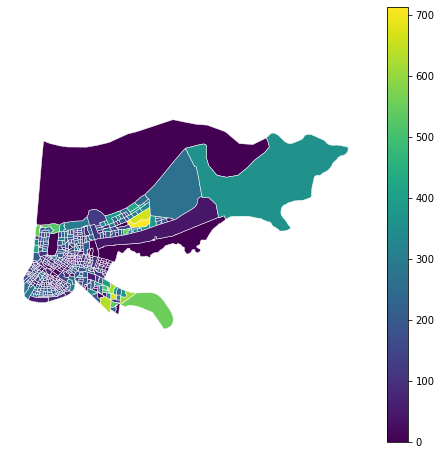

In [82]:
# Create the figure/axes
fig, ax = plt.subplots(figsize=(8, 8))

# Plot
halfmort_geo2.plot(
    ax=ax, 
    column="Grand_Total", 
    edgecolor="white", 
    linewidth=0.5, 
    legend=True, 
    cmap="viridis"
)

# Format
ax.set_axis_off()
ax.set_aspect("equal")



In [195]:
rdata_geo3452 = rdata_geo.to_crs('EPSG:3452')
ASdata_geo3452 = ASdata_geo.to_crs('EPSG:3452')


In [86]:
halfmort_geo2 = halfmort_geo2.drop(labels = 306, axis=0) ## Getting rid of LAke IDK why it has data

In [87]:
halfmort_geo2.loc[halfmort_geo2["GEOID"]=="220719900000"] ## Making sure it's gone

Empty GeoDataFrame
Columns: [MTFCC, OID, GEOID, STATE, COUNTY, TRACT, BLKGRP, BASENAME, NAME_x, LSADC, FUNCSTAT, AREALAND, AREAWATER, CENTLAT, CENTLON, INTPTLAT, INTPTLON, OBJECTID, geometry, NAME_y, mortgage_50.0_P_more, Total_mortgage, Total_no_mortgage, no_mortgage_50.0_P_more, Grand_Total, state, county, tract, block group, P_no_mortgage, P_mortgage, P_mort_50_P, P_no_mort_50_P]
Index: []

In [90]:
halfmort

NAME  mortgage_50.0_P_more  \
0    Block Group 2, Census Tract 108, Orleans Paris...                  17.0   
1    Block Group 2, Census Tract 6.01, Orleans Pari...                   0.0   
2    Block Group 1, Census Tract 6.11, Orleans Pari...                  13.0   
3    Block Group 2, Census Tract 107, Orleans Paris...                  24.0   
4    Block Group 2, Census Tract 132, Orleans Paris...                  42.0   
..                                                 ...                   ...   
492  Block Group 3, Census Tract 14.01, Orleans Par...                   0.0   
493  Block Group 5, Census Tract 14.01, Orleans Par...                   0.0   
494  Block Group 2, Census Tract 17.01, Orleans Par...                   0.0   
495  Block Group 2, Census Tract 31, Orleans Parish...                  11.0   
496  Block Group 2, Census Tract 33.01, Orleans Par...                  10.0   

     Total_mortgage  Total_no_mortgage  no_mortgage_50.0_P_more  Grand_Total  \
0             148.0              151.0                     22.0        299.0   
1               6.0                0.0                      0.0          6.0   
2             142.0              231.0                      0.0        373.0   
3             134.0               79.0                      6.0        213.0   
4             132.0               65.0                      0.0        197.0   
..              ...                ...                      ...          ...   
492             0.0               67.0                     16.0         67.0   
493             0.0               29.0                      0.0         29.0   
494            31.0               40.0                      0.0         71.0   
495            38.0              110.0                      0.0        148.0   
496           173.0               54.0                      0.0        227.0   

    state county   tract block group  P_no_mortgage  P_mortgage  P_mort_50_P  \
0      22    071  010800           2      50.501672   49.498328    11.486486   
1      22    071  000601           2       0.000000  100.000000     0.000000   
2      22    071  000611           1      61.930295   38.069705     9.154930   
3      22    071  010700           2      37.089202   62.910798    17.910448   
4      22    071  013200           2      32.994924   67.005076    31.818182   
..    ...    ...     ...         ...            ...         ...          ...   
492    22    071  001401           3     100.000000    0.000000     0.000000   
493    22    071  001401           5     100.000000    0.000000     0.000000   
494    22    071  001701           2      56.338028   43.661972     0.000000   
495    22    071  003100           2      74.324324   25.675676    28.947368   
496    22    071  003301           2      23.788546   76.211454     5.780347   

     P_no_mort_50_P  
0         14.864865  
1          0.000000  
2          0.000000  
3          4.477612  
4          0.000000  
..              ...  
492        0.000000  
493        0.000000  
494        0.000000  
495        0.000000  
496        0.000000  

[497 rows x 14 columns]

In [91]:
halfmort_geo2.hvplot(c='P_mort_50_P', 
                             width=900, 
                             height=600, 
                             alpha=0.6, 
                             geo=True,
                             cmap='plasma', 
                             hover_cols=['GEOID'])

:Polygons   [Longitude,Latitude]   (P_mort_50_P,GEOID)

In [228]:
r

:Polygons   [Longitude,Latitude]   (BAA,GEOID)

In [201]:
ASdata_geo3452.to_file("AS_BG3452.geojson", driver='GeoJSON')

In [204]:
rtcc = gpd.read_file(r'../Data/RTCC4326.geojson')

In [207]:
rtcc3452 = rtcc.to_crs(crs='EPSG:3452')

In [241]:
cam = rtcc3452.hvplot(color='white',
                      size=10,
                             width=900, 
                             height=600, 
                             alpha=0.9, 
                             geo=True,
                             crs = 3452)

In [242]:
r * cam

:Overlay
   .Polygons.I :Polygons   [Longitude,Latitude]   (BAA,GEOID)
   .Points.I   :Points   [Longitude,Latitude]